In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

/Users/mturilli/Virtualenvs/RP-PAPER-IPDPS18/lib/python2.7/site-packages/radical/utils/atfork/stdlib_fixer.py:63: UserWarning: logging module already imported before fixup.
  warnings.warn('logging module already imported before fixup.')


In [2]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
sws_sessions = pd.read_csv('data/synapse/weak_scaling/sessions.csv', index_col=0)
sws_pilots = pd.read_csv('data/synapse/weak_scaling/pilots.csv', index_col=0)
sws_units = pd.read_csv('data/synapse/weak_scaling/units.csv', index_col=0)

# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
ssc_sessions = pd.read_csv('data/synapse/strong_scaling/sessions.csv', index_col=0)
ssc_pilots = pd.read_csv('data/synapse/strong_scaling/pilots.csv', index_col=0)
ssc_units = pd.read_csv('data/synapse/strong_scaling/units.csv', index_col=0)

In [3]:
print 'Synapse: Weak Scaling: Total number of successful runs: %s' % sws_sessions.shape[0]
print 'Synapse: Weak Scaling: Total number of pilots: %s' % sws_pilots.shape[0]
print 'Synapse: Weak Scaling: Total number of units: %s\n' % sws_units.shape[0]

print 'Synapse: Strong Scaling: Total number of successful runs: %s' % ssc_sessions.shape[0]
print 'Synapse: Strong Scaling: Total number of pilots: %s' % ssc_pilots.shape[0]
print 'Synapse: Strong Scaling: Total number of units: %s\n' % ssc_units.shape[0]

Synapse: Weak Scaling: Total number of successful runs: 15
Synapse: Weak Scaling: Total number of pilots: 15
Synapse: Weak Scaling: Total number of units: 12224

Synapse: Strong Scaling: Total number of successful runs: 4
Synapse: Strong Scaling: Total number of pilots: 4
Synapse: Strong Scaling: Total number of units: 65536



In [4]:
sws = sws_sessions[sws_sessions.experiment == 'exp1'][
    ['nunit','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING','U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING']
        ].groupby(['nunit']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std']})

sws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_EXECUTING'   :'TTX'}, axis='columns', inplace=True)
sws.rename(index={i: '%s/%s' % (i, i*32) for i in sws.index.get_values()}, inplace=True)
sws

TTQ                Agent queueing            Agent queueing execution                   TTX                      TTC                Agent scheduling           
                     mean            std           mean        std                     mean       std        mean        std          mean            std             mean        std
nunit                                                                                                                                                                                
32/1024         376.17170     454.034961        0.33265   0.011526                  0.56305  0.006435   902.61050   3.436115    1462.53525     578.504776         0.289950   0.009404
64/2048         953.82985    1258.176663        0.82940   0.044406                  1.15940  0.015132   940.12655   0.003606    2075.82835    1376.075263         0.722000   0.029698
128/4096       1482.34230    1361.416162        1.93360   0.060953                  2.97690  0.231082   922.77575   3.545363    2514.00745    1364.736523         1.739001   0.057415
256/8192      15661.68065     215.067447        5.37200   0.008910                 14.34745  2.186444   978.65000  17.178594   16827.76960      89.619138         4.955049   0.012231
512/16384    138008.13775  194402.885826        9.68035   0.453468                 59.99210  5.236267  1019.28595  24.826590  139237.99160  194521.397983         8.648402   0.302925
1024/32768   180526.16485  139177.655438       49.39715  16.769815                153.19430  0.100551  1157.04735  10.245765  181891.89560  139304.898667        45.577102  15.803693
2048/65536    34266.88055   23283.984241      242.52515   3.192941                369.11190  2.443760  1428.51745  36.404898   35885.24325   23357.500578       225.011101   5.062887
4096/131072  736775.59040            NaN      737.18650        NaN                907.90640       NaN  2143.19690        NaN  739237.70420            NaN       665.269003        NaN

In [5]:
ssc = ssc_sessions[ssc_sessions.experiment == 'exp1'][
    ['ncore','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING','U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING']
        ].groupby(['ncore']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std']})

ssc.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
ssc.rename({'U_AGENT_EXECUTING'   :'TTX'}, axis='columns', inplace=True)
ssc.rename(index={i: '%s/%s' % (ssc_sessions[ssc_sessions.ncore == i].nunit[0], i) for i in ssc.index.get_values()}, 
           inplace=True)
ssc

TTQ                Agent queueing            Agent queueing execution                     TTX                       TTC                Agent scheduling            
                     mean            std           mean        std                     mean        std         mean         std          mean            std             mean         std
ncore                                                                                                                                                                                    
16384/32816  117918.90005   52845.711064       480.8133   3.718533               184.740061  89.250795  14358.29425  258.935079  132400.46195   52624.290475     13405.488704  238.037170
16384/65584  346639.07670  472754.901373      1030.9101  14.207755               121.923205   3.088517   7611.91810   29.168296  354369.67560  472793.501342      6632.908649    8.731992

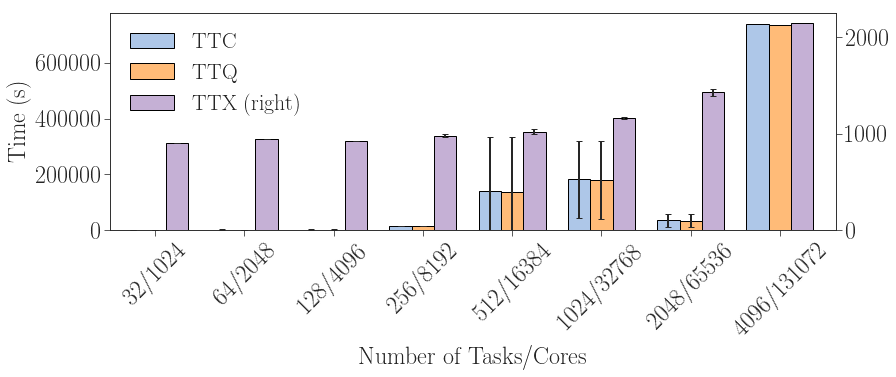

In [6]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)  

# Plot means and std bars
sws['TTC'].reset_index().plot.bar(
    x='nunit', y='mean', yerr='std',
    position=1.5, width=0.25, color=tableau20[1], ax=ax, rot=45,
    label='TTC')

sws['TTQ'].reset_index().plot.bar(
    x='nunit', y='mean', yerr='std',
    position=0.5, width=0.25, color=tableau20[3], ax=ax, rot=45,
    label='TTQ')

sws['TTX'].reset_index().plot.bar(
    x='nunit', y='mean', yerr='std', 
    position=-0.5, width=0.25, color=tableau20[9], ax=ax, rot=45, secondary_y=True,
    label='TTX')

ax.set_xlabel('Number of Tasks/Cores')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_titan_rp_weak_scaling.pdf', dpi=600, bbox_inches='tight')

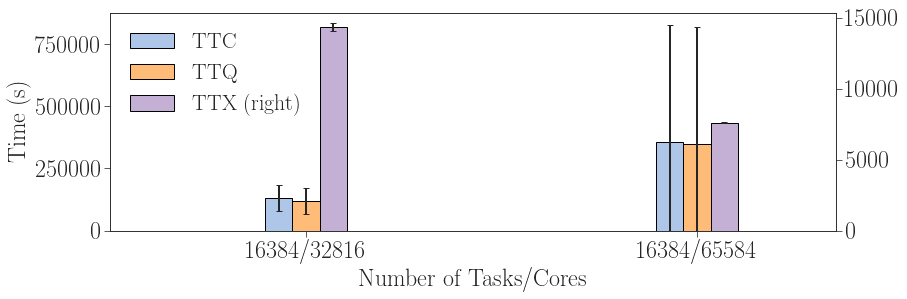

In [7]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)  

# Plot means and std bars
ssc['TTC'].reset_index().plot.bar(
    x='ncore', y='mean', yerr='std',
    position=1.5, width=0.07, color=tableau20[1], ax=ax, rot=0,
    label='TTC')

ssc['TTQ'].reset_index().plot.bar(
    x='ncore', y='mean', yerr='std',
    position=0.5, width=0.07, color=tableau20[3], ax=ax, rot=0,
    label='TTQ')

ssc['TTX'].reset_index().plot.bar(
    x='ncore', y='mean', yerr='std', 
    position=-0.5, width=0.07, color=tableau20[9], ax=ax, rot=0, 
    secondary_y=True,
    label='TTX')

ax.set_xlabel('Number of Tasks/Cores')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_titan_rp_synapse_strong_scaling.pdf', dpi=600, bbox_inches='tight')

In [8]:
# Load sessions for Synapse experiment 1
ws_sras = load_sessions_units('/Users/mturilli/Projects/RADICAL/github/experiments/rp-paper-ipdps2018/analysis/data/synapse/weak_scaling', 
                     sws_sessions, 
                     sorted(sws_sessions.nunit.unique().tolist()))

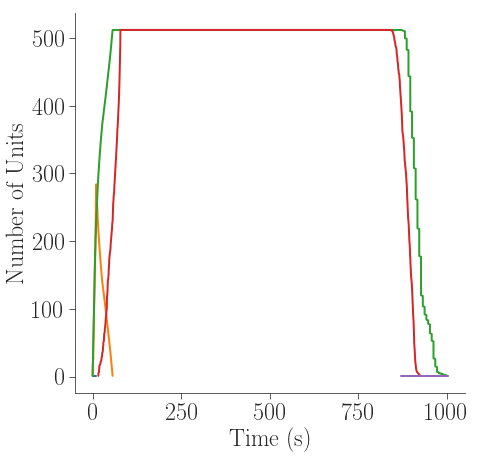

In [9]:
fig, ax = fig_setup(figsize=(7,7))
session  = ws_sras[512][0]

base = session.concurrency(
        event=[
         {ru.STATE: None, ru.EVENT: 'schedule_try'},
         {ru.STATE: None, ru.EVENT: 'schedule_ok'}]
       )[0][0]

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Preparing Execution stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
 {ru.STATE: None, ru.EVENT: 'app_stop'}])                   # Executed
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

# ax.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.25),
#           labels=['Scheduling', 'Queuing Executor', 'Preparing Execute', 
#                   # 'Checking Directory', 'Spawning', 
#                   'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

#ax.set_ylim(0,4096)
#ax.set_xlim(0,2143)

plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_concurrency_512.pdf', dpi=600, bbox_inches='tight')

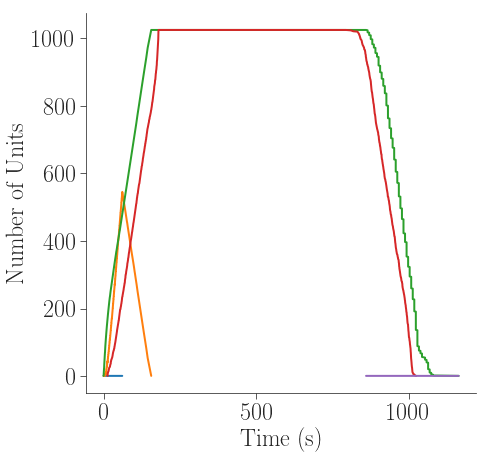

In [10]:
fig, ax = fig_setup(figsize=(7,7))
ssize = 1024
session  = ws_sras[ssize][0]

base = session.concurrency(
        event=[
         {ru.STATE: None, ru.EVENT: 'schedule_try'},
         {ru.STATE: None, ru.EVENT: 'schedule_ok'}]
       )[0][0]

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Preparing Execution stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
 {ru.STATE: None, ru.EVENT: 'app_stop'}])                   # Executed
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

# ax.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.25),
#           labels=['Scheduling', 'Queuing Executor', 'Preparing Execute', 
#                   # 'Checking Directory', 'Spawning', 
#                   'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

#ax.set_ylim(0,4096)
#ax.set_xlim(0,2143)

plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_concurrency_%s.pdf' % ssize, dpi=600, bbox_inches='tight')

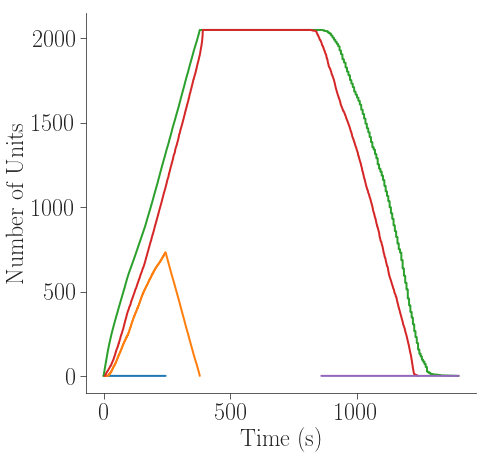

In [11]:
fig, ax = fig_setup(figsize=(7,7))
ssize = 2048
session  = ws_sras[ssize][0]

base = session.concurrency(
        event=[
         {ru.STATE: None, ru.EVENT: 'schedule_try'},
         {ru.STATE: None, ru.EVENT: 'schedule_ok'}]
       )[0][0]

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Preparing Execution stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
 {ru.STATE: None, ru.EVENT: 'app_stop'}])                   # Executed
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

# ax.legend(ncol=3, loc='upper left', bbox_to_anchor=(0,1.25),
#           labels=['Scheduling', 'Queuing Executor', 'Preparing Execute', 
#                   # 'Checking Directory', 'Spawning', 
#                   'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

#ax.set_ylim(0,4096)
#ax.set_xlim(0,2143)

plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_concurrency_%s.pdf' % ssize, dpi=600, bbox_inches='tight')

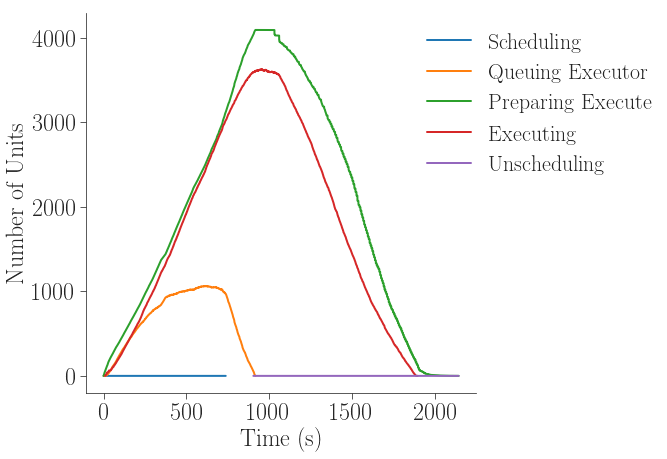

In [12]:
fig, ax = fig_setup(figsize=(7,7))
ssize = 4096
session  = ws_sras[ssize][0]

base = session.concurrency(
        event=[
         {ru.STATE: None, ru.EVENT: 'schedule_try'},
         {ru.STATE: None, ru.EVENT: 'schedule_ok'}]
       )[0][0]

# How many units are being scheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'schedule_try'},               # Scheduling start
 {ru.STATE: None, ru.EVENT: 'schedule_ok'}])               # Scheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[6])

# How many units are being queued for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING_PENDING', ru.EVENT: 'state'}, # Queuing Execution start
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'}])        # Queuing Execution stop  
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[4])

# How many units are being prepared for execution
scu = session.concurrency(event=[
 {ru.STATE: 'AGENT_EXECUTING', ru.EVENT: 'state'},         # Preparing Execution start
 {ru.STATE: None, ru.EVENT: 'exec_stop'}])                 # Preparing Execution stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[12])

# How many units are being executed
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'app_start'},                   # Execution start
 {ru.STATE: None, ru.EVENT: 'app_stop'}])                   # Executed
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[0])

# How many units are being unscheduled
scu = session.concurrency(event=[
 {ru.STATE: None, ru.EVENT: 'unschedule_start'},            # Unscheduling start
 {ru.STATE: None, ru.EVENT: 'unschedule_stop'}])            # Unscheduling stop
x = [item[0]-base for item in scu]
y = [item[1] for item in scu]
ax.plot(x, y) #, color=tableau20[8])

ax.legend(#ncol=3, 
          loc='upper right', bbox_to_anchor=(1.5,1),
          labels=['Scheduling', 'Queuing Executor', 'Preparing Execute', 
                  # 'Checking Directory', 'Spawning', 
                  'Executing', 'Unscheduling'])
plt.xlabel('Time (s)')
plt.ylabel('Number of Units')

#ax.set_ylim(0,4096)

plt.savefig('figures/paper_titan_rp_synapse_weak_scaling_concurrency_%s.pdf' % ssize, dpi=600, bbox_inches='tight')